# DEVOIR N°2


Vous devez compresser le dossier contenant vos réponses et le nommer par <strong>Your_Name_FirstName.zip</strong> et envoyez-le à mon adresse gamil: red.ezzahir 


Vous devez également remettre le devoir en format papier 

# Question 1 (5pts)

Décrire en 30 lignes maximum le principe des algorithmes génétiques ?
vous pour insert 4 images au maximum (voir en bas comment l'image est inserée)

Les algorithmes génétiques (AG) sont des méthodes d'optimisation inspirées de la sélection naturelle et de la génétique. Ils imitent les mécanismes d'évolution pour résoudre des problèmes complexes en recherchant des solutions optimales ou quasi-optimales. Voici les principales étapes de fonctionnement des AG :

1. **Initialisation** : L'algorithme génère une population initiale d'individus, chacun représentant une solution possible au problème. Ces solutions sont souvent codées sous forme de chaînes de caractères, comme des suites binaires.

2. **Évaluation** : Chaque individu est évalué à l'aide d'une fonction de fitness (ou d'aptitude), qui mesure sa qualité ou son efficacité à résoudre le problème. Les individus avec des scores élevés ont de meilleures chances d'être sélectionnés pour la reproduction.

3. **Sélection** : L'algorithme sélectionne les meilleurs individus pour générer la prochaine génération. Les méthodes courantes de sélection incluent le tournoi et la roulette.

4. **Croisement (Crossover)** : Les individus choisis se combinent pour former de nouveaux individus, appelés descendants. Le croisement permet de mélanger les caractéristiques des parents pour potentiellement améliorer les solutions.

5. **Mutation** : Pour éviter la stagnation et explorer de nouvelles solutions, de petites modifications aléatoires sont appliquées aux descendants. Cela maintient la diversité génétique et permet à l'algorithme d'échapper aux minima locaux.

6. **Boucle d’évolution** : Les étapes de sélection, croisement et mutation sont répétées pour de nombreuses générations. La population évolue ainsi vers des solutions de plus en plus adaptées.

7. **Arrêt** : L’algorithme s'arrête lorsqu'il atteint un nombre défini de générations ou une solution satisfaisante. 

Les AG sont utilisés dans des domaines variés, comme l'optimisation des réseaux, l'intelligence artificielle, la finance, et la recherche opérationnelle. Leur principal avantage est leur capacité à explorer efficacement de vastes espaces de solutions.

Le code de ce devoir s'appuie sur la mise en œuvre que nous avons vue lors de travaux pratiques sur les algorithmes génétiques

In [16]:
from random import choices, choice, randint, randrange, shuffle, sample
from random import random as rnd
from typing import List, Optional, Callable, Tuple, Set
from copy import  deepcopy
from functools import partial,   reduce
from statistics import mean, stdev
import time 

Genome = List[int]
Chromosome = List[int] 
Population = List[Chromosome]
PopulateFunc = Callable[[], Population]
FitnessFunc = Callable[[Chromosome], int]
SelectionFunc = Callable[[Population, FitnessFunc], Tuple[Chromosome, Chromosome]]
CrossoverFunc = Callable[[Chromosome, Chromosome], Tuple[Chromosome, Chromosome]]
MutationFunc = Callable[[Chromosome], Chromosome]
PrinterFunc = Callable[[Population, int, FitnessFunc], None]



def generate_chromosome(genome: Genome,  chromosome_length=None) -> Chromosome:
    if  chromosome_length is None: 
        return choices(genome, k=len(genome))
    else:
        return choices(genome, k=chromosome_length)


def generate_population (size: int, genome: Genome,  chromosome_length=None ) -> Population: 
    population = []
    i = 0
    while len(population) < size:
        chromosome = generate_chromosome(genome, chromosome_length)
        if not chromosome in population or i == 10: 
            population.append(chromosome)
            i = 0
        else :
            i +=1
        
    return population



def single_point_crossover(a: Chromosome, b: Chromosome) -> Tuple[Chromosome, Chromosome]:
    if not len(a)==len(b):
        raise ValueError("The given chromosones don't have the same length!")
    r = randint(1, len(a)-1)  
    x, y = a.copy(), b.copy()  
    for i in range(r):
        x[i], y[i] = y[i], x[i]
    return x, y
        

def mutation(chromosome: Chromosome, genome: Genome, 
             probability: float = 0.2) -> Chromosome:
    """Mutate, usually with a low probability, the given chromosome. 
     @param chromosome: chromosome to mutate
     @param probability: probability that a mutation attempt will be successful
    """
    chromosome  = chromosome.copy() 
    r = rnd() 
    if r < probability:
        p = randrange(0, len(chromosome))
        x = choice(genome)
        while(x == chromosome[p]):
            x = choice(genome)
        
        chromosome[p]=x
    
    return chromosome


def population_fitness(population: Population, fitness_func: FitnessFunc) -> int:
    return reduce(lambda x, y: x+y, map(fitness_func, population))


def selection_pair(population: Population, fitness_func: FitnessFunc,  maximize: bool = False) -> Population:
    fitnesses= list(map(fitness_func, population))
    if not maximize : 
        maxi= max(fitnesses)
        fitnesses= map(lambda x: maxi-x+1, fitnesses)
    return  choices(population, weights=fitnesses,  k=2)
        

#help(sorted)
def sort_population(population: Population, 
                    fitness_func: FitnessFunc, 
                    maximize: bool=False) -> Population:
    return sorted(population, key = fitness_func, reverse=maximize)
    

def chromosome_to_string(chromosome: Chromosome) -> str:
    return ''.join(map(str,chromosome))


def print_statistics(population: Population, generation_id: int,  fitness_func: FitnessFunc):
    
    print("GENERATION %02d" % generation_id)
    print("=================")
    print("Population: [%s]" % ", ".join([chromosome_to_string(ch) for ch in population]))
    

    fitness = list(map(fitness_func, population))
    
    print("  Min %s" % min(fitness))
    print("  Max %s" % max(fitness))
    print("  Avg %s" % mean(fitness))
    print("  Std %s" % stdev(fitness))

     
        
def get_statistics(population: Population, generation_id: int,  fitness_func: FitnessFunc):  
    fitness = list(map(fitness_func, population)) 
    return generation_id,  min(fitness),  max(fitness),  mean(fitness), stdev(fitness)

     
    
def run_evolution(populate_func: PopulateFunc, fitness_func: FitnessFunc, 
                  fitness_limit: int, maximize: bool = False,
                  selection_func: SelectionFunc = selection_pair,
                  crossover_func: CrossoverFunc = single_point_crossover,
                  mutation_func: MutationFunc = mutation, generation_limit: int = 100,
                  printer: Optional[PrinterFunc] = None) -> Tuple[Population, int]:  
    
    #generate a population initial
    population = populate_func()
    # sort and assign the population 
    population = sort_population(population, fitness_func, maximize)
    # iterate until the generation_limit
    for i in range(generation_limit) : 
        # print the i^th generation if a printer is given
        if not printer is None:
            printer(population, i, fitness_func)
        
        # we break if the fitness_limit is reached, >=fitness_limit when maximization and <=fitness_limit for minimizatio
        best_fitness =fitness_func(population[0])
        if (maximize and best_fitness >= fitness_limit) \
                or (not maximize and best_fitness <= fitness_limit):
            break;
             
        # initialize next_generation by the two first individuals in the sorted population
        next_generation = [population[0], population[1]]
        while len(next_generation) < len(population): 
            # select  a pair of parents  uning selection_func and fitness_func 
            x, y = selection_func(population, fitness_func, maximize) 
            # call crossover_func to get offspring a, b from the parents
            a, b = crossover_func(x, y)
            # apply  mutation_func on each offspring 
            a = mutation_func(a)
            b = mutation_func(b)
            # increment the next generation 
            next_generation.append(a)
            next_generation.append(b)
            

        # population = next_generation
        population = next_generation
        # sort and assign the population 
        population = sort_population(population, fitness_func, maximize) 
        
    printer(population, i, fitness_func)
    best_fitness =fitness_func(population[0])
 
    return population, best_fitness, i
 

    


# Question 2 (3pts)
Dans ce problème, une fonction présentant plusieurs maxima locaux (ce qui rend inapplicables les algorithmes les plus simples de recherche de maximum) est définie sur un certain intervalle et le but est de déterminer à l'aide des algorithmes génétiques l'abscisse du maximum global (sur l'intervalle) de la fonction. On va donc utiliser une population dans laquelle chaque individu correspond à une abscisse située dans l'intervalle.

La fonction $g(x) =x^2cos(1/(10x))sin(x/10)/10$ à optimiser est présentée dans la figure suivante:



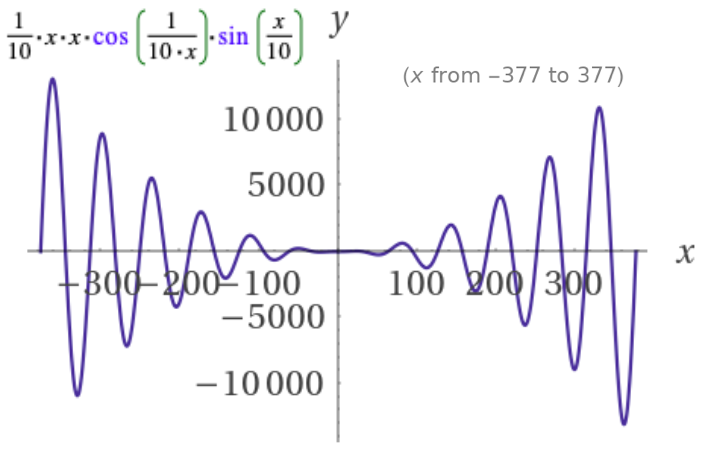

### Remarque :

l’étude d’une fonction à une variable n’a pour but uniquement la démonstration pédagogique et illustratif, puisque vous constaterez que le nombre total d'abscisses testées avant d'atteindre le maximum global (égal au nombre de générations multiplié par la taille de la  population) est généralement tel qu'on aurait un aussi bon résultat en répartissant simplement ce nombre d'abscisses uniformément sur l'intervalle puis en cherchant Max(f(Xi)). L'intérêt des algorithmes génétiques pour la recherche de maximum de fonction n'est en pratique réel que dans le cas d'une fonction à beaucoup de variables, car alors toute exploration systématique de l'espace des n-uplets possibles devient prohibitive, tandis qu'un algorithme génétique peut rester efficace. Malheureusement, la visualisation de la recherche du maximum d'une fonction à n variables est problématique pour n=2, et devient carrément impossible (ou en tout cas incompréhensible) pour n>=3...


### Codage du Chromosome

Une des premières questions qui se posent est celle du codage : à quelle séquence de gènes faire correspondre une abscisse de l'intervalle ? On peut faire le choix de prendre chaque gène égal à un bit (donc le génome original est 01), et de faire correspondre à chaque chromosome  (du type 10011100...) l'abscisse 
$x = xMin + N*(xMax - xMin)/Nmax $
où N est l'entier dont la représentation binaire est donnée par le chromosome, et Nmax est le plus grand entier représentable avec le nombre de bits correspondant à taille du chromosome. Il ne reste donc plus qu'à choisir le nombre de bits constituant le génome de chaque individu. 
 Nous nous intéressons à optimiser la fonction g(x) dans l’intervalle $I=[-255, 255]$.
 

### 2.1) Que représentent  xMin, et xMax.
 

In [17]:
xMin, xMax =  -255, 255


### 2.2)  Taille du chromosome 
Si la taille du chromosome est n bits,  donner Nmax:le nombre maximum du chromosone representables en fonction de n (noté bien que pour  8 bits =>  Nmax=256), puis déduire le nombre minimal de bits (n_min) constituant le chromosome de chaque individu pour pouvoir representer 8 individus entre chaque deux entiers de l’interval I (Le nombre total d'individus representable est donc (xMax - xMin + 1)*8.


In [18]:
# Retourne l'entier maximum à représenter par n bits
def n_max(n):
    return 2**n - 1

# Retourne le nombre minimum de bits pour représenter N chromosomes
def n_bits(N):
    return N.bit_length()  # Notez qu'on ne soustrait pas 1 ici, car bit_length() donne le nombre de bits nécessaire.

# Définir les bornes de l'intervalle
x_min = -255
x_max = 255

# Nombre d'individus à représenter
number_of_individuals = 8

# Déduire Nmax en fonction de xMin et xMax
# Puisque nous voulons 8 réels, Nmax sera le nombre d'intervalles = number_of_individuals - 1
Nmax = number_of_individuals - 1

# Déduire le nombre minimal de bits (n_min)
n_min = n_bits(Nmax)

# Affichage des résultats
print('Nmax =', Nmax)
print('n_min =', n_min)


Nmax = 7
n_min = 3


# Question 3 (3pts)
#### MAXIMIZING g(x) =x^2/10 cos(1/(10x))sin(x/10) USING GENETIC ALGORITHM 

##### 3.1) Ecrire la fonction genome_gx que retourne un genome composé de deux gènes 0 et 1

In [19]:
def genome_gx(length: int) -> Chromosome:
    """Retourne un génome composé de gènes 0 et 1."""
    return [randint(0, 1) for _ in range(length)]


#### 3.2) En utilisant l'opérateur de décalage de bits +| ecrire la fonction qui convertie un chromosome  (liste binaire) en entier.


In [20]:
def chromosome_to_integer(chromosome: Chromosome) -> int:
    """Convertit un chromosome binaire en entier en utilisant le décalage de bits et l'opérateur |."""
    result = 0
    for bit in chromosome:
        result = (result << 1) | bit  # Décalage à gauche et ajout du bit
    return result


#### 3.3) En utilisant la fonction précedente ecrire une fonction qui transforme un chromosome en un individus x (abscisse) $x = xMin + N*(xMax - xMin)/Nmax $, ou N est l'entier représenté par le chromosome.

In [26]:
def chromosome_to_x(chromosome: Chromosome, x_min: float, x_max: float) -> float:
    """Transforme un chromosome en abscisse x."""
    N = chromosome_to_integer(chromosome)
    Nmax = n_max(len(chromosome))  # Nmax est le maximum entier que l'on peut représenter avec la taille du chromosome
    x = x_min + (N * (x_max - x_min) / Nmax)  # Conversion de N à x
    return x


#### 3.4) En utilisant la fonction précedente ecrire la fonction gx qui retourne l'évaluation d'un chromosome par la fonction $g(x) =x^2cos(1/(10x))sin(x/10)/10$  attention! si x=0 return 0 pour eviter l'exception ZeroDivisionError

In [27]:
import numpy as np

def gx(chromosome: Chromosome, x_min: float, x_max: float) -> float:
    """Évalue un chromosome par la fonction g(x)."""
    # Convertir le chromosome en abscisse x
    x = chromosome_to_x(chromosome, x_min, x_max)
    
    # Évaluer g(x) tout en évitant la division par zéro
    if x == 0:
        return 0.0
    else:
        return (x ** 2 / 10) * np.cos(1 / (10 * x)) * np.sin(x / 10)


#### 3.5) En utilisant le moteur de recherche de google  (ecrire dans le champs de recherche l'expression x*x cos(1/(10x))sin(x/10)/10 ) verifier que la valeur minimale de g dans l'intervale $I$ est $-5555$ et mettre le boolean à True si oui.

In [28]:
verified = False

#### 3.6)  Ecrire la fonction fitenss_gx  qui retourne  (gx(chromosone) + 5555)/10

In [29]:
def fitness_gx(chromosome: Chromosome, x_min: float, x_max: float) -> float:
    """Calcule la valeur de fitness d'un chromosome en évaluant g(x)."""
    return gx(chromosome, x_min, x_max)


#### 3.7)  Expliquer pourquoi nous avons ajouté 5555 à gx et pour quel raison nous avons divisé par 10

Nous ajoutons \(5555\) pour que la fonction \(g(x)\) reste positive, ce qui facilite la maximisation puisque les algorithmes génétiques préfèrent des valeurs de fitness positives. La division par \(10\) réduit l'échelle des valeurs pour stabiliser les calculs et éviter les grandes variations, aidant ainsi à une convergence plus rapide.

#### 3.8) Quelle est la valeur max du fitness_gx  ( ) si le max de g(x) dans I est 5555

In [30]:
FITNESS_LIMIT = 1111

#### 3.9) C'est le temps de tester l'agorithme genetique sur g(x) 

In [31]:
POPULATION_SIZE = 4
MUTATION_RATE = 0.15
GENERATION_LIMIT =  1000


In [43]:
def run_genetic():
    # Other necessary initializations
    start = time.time()
    chromosome_length = n_bits(Nmax)  # Calculate the required length for the chromosomes

    population, best_f, generations = run_evolution(
        populate_func=partial(generate_population, size=POPULATION_SIZE, genome=genome_gx(length=chromosome_length), chromosome_length=chromosome_length),
        fitness_func=fitness_func,  # Pass the fitness function here
        mutation_func=partial(mutation, genome=genome_gx(length=chromosome_length), probability=MUTATION_RATE),
        fitness_limit=FITNESS_LIMIT,
        crossover_func=single_point_crossover,
        printer=print_statistics,
        maximize=False,  # Use False for minimization
        generation_limit=GENERATION_LIMIT
    )

    end = time.time()
    elapsed_time = end - start
    # Other processing
    return generations, population, best_fitness, best_fitness, avg_fitness, stdev_fitness, elapsed_time



# Question 4 (3pts)

L'impact du nombre d'individus de la population sur la convergence:
si celui-ci est trop petit, il faut beaucoup plus de générations pour atteindre le maximum, car il n'y a pas assez de variété dans la population initiale, et seules les mutations finissent par permettre à l'algorithme de converger.

En suivant le schema suivant (Même principe utilié en devoir pour collecter et plotter des résultats) :

Initialisez un Tableau des resultats  (Results)

Pour POPULATION_SIZE allons de 2 jusqu'à 20 faire

    pour i alons de 1 jusqu'à 100 faire
        executez la fonction run_genetic() 
        les resultats sont collecter dans une liste 
    
    calculez les moyennes sur les 100 executions uiliser le module statistic vois plus haut
    et sauvgardez les dans le Tableau Results
    
Tracer les courbes des resultats (fitness, avg_fitness, generations, temps) en fonction de POPULATION_SIZE

Note: fitness et avg_fitness pouvent être tracées sur la même figure.

Commentez les courbes.



In [44]:
from functools import partial

# Define your x_min and x_max range for x
x_min = -10  # or any specific range you are working within
x_max = 10

# Calculate chromosome length based on the maximum value Nmax
Nmax = 255  # or any suitable value for your application
chromosome_length = n_bits(Nmax)  # Function that calculates the required number of bits

# Define the fitness function as a partial function
fitness_func = partial(fitness_gx, x_min=x_min, x_max=x_max)

# Now run the genetic algorithm with the defined chromosome_length
population, best_f, generations = run_evolution(
    populate_func=partial(generate_population, size=population_size, genome=genome_gx(length=chromosome_length), chromosome_length=chromosome_length),
    fitness_func=fitness_func,  # Use the partial version here
    mutation_func=partial(mutation, genome=genome_gx(length=chromosome_length), probability=MUTATION_RATE),
    fitness_limit=FITNESS_LIMIT,
    crossover_func=single_point_crossover,
    printer=print_statistics,
    maximize=True,  # or False if minimizing
    generation_limit=GENERATION_LIMIT
)


GENERATION 00
Population: [10000011, 00010101]
  Min -5.1731526811418
  Max 0.0001932599503902201
  Avg -2.5864797105957047
  Std 3.658107996370189
GENERATION 01
Population: [10000011, 00010101]
  Min -5.1731526811418
  Max 0.0001932599503902201
  Avg -2.5864797105957047
  Std 3.658107996370189
GENERATION 02
Population: [10000011, 00010101]
  Min -5.1731526811418
  Max 0.0001932599503902201
  Avg -2.5864797105957047
  Std 3.658107996370189
GENERATION 03
Population: [10000011, 00010101]
  Min -5.1731526811418
  Max 0.0001932599503902201
  Avg -2.5864797105957047
  Std 3.658107996370189
GENERATION 04
Population: [10000011, 00010101]
  Min -5.1731526811418
  Max 0.0001932599503902201
  Avg -2.5864797105957047
  Std 3.658107996370189
GENERATION 05
Population: [10000011, 00010101]
  Min -5.1731526811418
  Max 0.0001932599503902201
  Avg -2.5864797105957047
  Std 3.658107996370189
GENERATION 06
Population: [10000011, 00010101]
  Min -5.1731526811418
  Max 0.0001932599503902201
  Avg -2.58647

# Question 5 (3pts)


L'influence de la taille du chromosome : si elle est trop faible, l'algorithme est susceptible de se bloquer dans un maximum local au lieu de converger vers le maximum global.

En suivant le même schema mais en fixant POPULATION_SIZE à la bonne valueur déduite de la question précedente (le cas écheant utiliser POPULATION_SIZE=6), et en variant 
Nmax sur [16, 32, 64, 128, 255, 1024, 2047]

Tracer les courbes des resultats (fitness, avg_fitness, generations, temps) en fonction de n_bits(Nmax)

Note: fitness et avg_fitness pouvent être ploté sur la même figure.

Commentez les courbes.




In [46]:
import matplotlib.pyplot as plt
import numpy as np
import statistics
from functools import partial

# Fixed population size
POPULATION_SIZE = 6  # Based on previous findings or set to 6 as a fallback
NMAX_VALUES = [16, 32, 64, 128, 255, 1024, 2047]
EXECUTIONS_PER_SIZE = 100

# Define your x_min and x_max range for x
x_min = -10  # Replace with the appropriate minimum value
x_max = 10   # Replace with the appropriate maximum value

# Result storage
results = {
    "n_bits": [],
    "avg_max_fitness": [],
    "avg_avg_fitness": [],
    "avg_generations": [],
    "avg_time": []
}

for Nmax in NMAX_VALUES:
    # Calculate the chromosome length for the current Nmax
    chromosome_length = n_bits(Nmax)

    # Lists to store results for each execution
    fitness_results = []
    avg_fitness_results = []
    generation_results = []
    time_results = []

    for i in range(EXECUTIONS_PER_SIZE):
        # Use partial to define the fitness function with x_min and x_max
        fitness_func = partial(fitness_gx, x_min=x_min, x_max=x_max)

        # Run the genetic algorithm with the current chromosome length
        gen_i, x, min_fit, max_fit, avg_fit, stdev_fit, t = run_genetic()

        # Collect results
        fitness_results.append(max_fit)
        avg_fitness_results.append(avg_fit)
        generation_results.append(gen_i)
        time_results.append(t)

    # Compute averages and standard deviations
    results["n_bits"].append(chromosome_length)
    results["avg_max_fitness"].append(statistics.mean(fitness_results))
    results["avg_avg_fitness"].append(statistics.mean(avg_fitness_results))
    results["avg_generations"].append(statistics.mean(generation_results))
    results["avg_time"].append(statistics.mean(time_results))

# Plotting results
plt.figure(figsize=(14, 8))

# Fitness and Average Fitness
plt.subplot(2, 2, 1)
plt.plot(results["n_bits"], results["avg_max_fitness"], label="Max Fitness")
plt.plot(results["n_bits"], results["avg_avg_fitness"], label="Avg Fitness")
plt.xlabel("Chromosome Length (n_bits)")
plt.ylabel("Fitness")
plt.legend()
plt.title("Max and Avg Fitness vs Chromosome Length")

# Generations
plt.subplot(2, 2, 2)
plt.plot(results["n_bits"], results["avg_generations"], label="Generations", color="purple")
plt.xlabel("Chromosome Length (n_bits)")
plt.ylabel("Generations")
plt.title("Generations vs Chromosome Length")

# Execution Time
plt.subplot(2, 2, 3)
plt.plot(results["n_bits"], results["avg_time"], label="Execution Time (s)", color="orange")
plt.xlabel("Chromosome Length (n_bits)")
plt.ylabel("Execution Time (s)")
plt.title("Execution Time vs Chromosome Length")

plt.tight_layout()
plt.show()


GENERATION 00
Population: [00000, 00001, 00010, 01100, 10000, 11000]
  Min -8.414289116092679
  Max 1.5674711560383605
  Avg -3.301062908356067
  Std 4.270031165859116
GENERATION 00
Population: [00000, 00001, 00010, 01100, 10000, 11000]
  Min -8.414289116092679
  Max 1.5674711560383605
  Avg -3.301062908356067
  Std 4.270031165859116


NameError: name 'best_fitness' is not defined

# Question 6 (2pts)

#### MINIMIZING g(x) =x^2/10 cos(1/(10x))sin(x/10) USING GENETIC ALGORITHM 
reécrire les codes de la question 3 pour lancer un teste de minimization de g(x)

In [48]:
import numpy as np
import time
from functools import partial

# Define constants
POPULATION_SIZE = 100  # Example size of the population
MUTATION_RATE = 0.01   # Example mutation rate
FITNESS_LIMIT = 0.001  # Example fitness limit
GENERATION_LIMIT = 1000  # Example generation limit
X_MIN = -10  # Minimum value for x
X_MAX = 10   # Maximum value for x
Nmax = 100   # Example max for n_bits function

# Your objective function
def g(x):
    return (x ** 2) / 10 * np.cos(1 / (10. * x)) * np.sin(x / 10.)

# Your fitness function and other functions remain unchanged

# Now you can define your run_genetic_minimize function as before
def run_genetic_minimize():
    start = time.time()
    chromosome_length = n_bits(Nmax)  # Calculate the required length for the chromosomes

    population, best_f, generations = run_evolution(
        populate_func=partial(generate_population, size=POPULATION_SIZE, genome=genome_gx(length=chromosome_length), chromosome_length=chromosome_length),
        fitness_func=partial(fitness_gx, x_min=X_MIN, x_max=X_MAX),
        mutation_func=partial(mutation, genome=genome_gx(length=chromosome_length), probability=MUTATION_RATE),
        fitness_limit=FITNESS_LIMIT,
        crossover_func=single_point_crossover,
        printer=print_statistics,
        maximize=False,   # Set to False for minimization
        generation_limit=GENERATION_LIMIT
    ) 
    end = time.time() 
    elapsed_time = end - start

    generation_id, min_fit, max_fit, avg_fit, stdev_fit = get_statistics(population, generations, fitness_func=fitness_gx)
    return generation_id, chromosome_to_x(population[0]), min_fit, max_fit, avg_fit, stdev_fit, elapsed_time

# Testing the minimization
gen_i, x_minimum, min_fit, max_fit, avg_fit, stdev_fit, t = run_genetic_minimize()
print("x that minimizes g(x): {:.2f}".format(x_minimum))
print("g({:.2f}) = {:.2f}".format(x_minimum, g(x_minimum)))


GENERATION 00
Population: [0001011, 0010011, 0010101, 0010110, 0011011, 0011110, 0011111, 0100111, 0101011, 0101100, 0101110, 0101111, 0101111, 0110011, 0110100, 0110101, 0110111, 0111001, 0111010, 0111011, 0111100, 0111101, 0111110, 0111111, 0111111, 1001001, 1001110, 1001111, 1001111, 1010101, 1010110, 1010111, 1010111, 1011001, 1011010, 1011011, 1011101, 1011101, 1011110, 1011110, 1011110, 1011111, 1011111, 1011111, 1011111, 1011111, 1011111, 1011111, 1011111, 1100011, 1100101, 1100111, 1101001, 1101010, 1101011, 1101100, 1101100, 1101101, 1101110, 1101111, 1101111, 1101111, 1110000, 1110010, 1110011, 1110101, 1110101, 1110110, 1110110, 1110111, 1111000, 1111001, 1111010, 1111011, 1111011, 1111100, 1111100, 1111101, 1111101, 1111101, 1111110, 1111110, 1111110, 1111110, 1111110, 1111111, 1111111, 1111111, 1111111, 1111111, 1111111, 1111111, 1111111, 1111111, 1111111, 1111111, 1111111, 1111111, 1111111, 1111111]
  Min -5.028853088284066
  Max 8.414289116092679
  Avg 3.167293376450719


TypeError: fitness_gx() missing 2 required positional arguments: 'x_min' and 'x_max'